In [24]:
from astropy.table import Table, Column
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import os
import urllib.request

In [25]:
os.chdir("/Users/Roberto Benard Orci/Documents/UNI/Verano Investigacion/Simulation data")
os.getcwd()

'C:\\Users\\Roberto Benard Orci\\Documents\\UNI\\Verano Investigacion\\Simulation data'

In [26]:
Halos = np.load("/Users/Roberto Benard Orci/Documents/UNI/Verano Investigacion/Simulation data/halos.npy")
DMP = np.load("/Users/Roberto Benard Orci/Documents/UNI/Verano Investigacion/Simulation data/dm_cat_ds_1000.npy")
CheckingEverythingIsAlright = 1

In [27]:
# MassBins, where:  

MassBin1 = []    #         MB < 1e13
MassBin2 = []    # 1e13 <= MB <5e13
MassBin3 = []    # 5e13 <= MB <1e14
MassBin4 = []    # 1e14 <= MB <5e14
MassBin5 = []    # 5e14 <= MB <1e15
MassBin6 = []    #         MB >= 1e15

for m, x, y, z, Vx, Vy, Vz in zip(Halos[:,0], Halos[:,1], Halos[:,2], Halos[:,3], Halos[:,4], Halos[:,5], Halos[:,6]) :
    if m >= 1.0*10**15 :
        MassBin1.append([m, x, y, z, Vx, Vy, Vz])
    elif m >= 5.0*10**14 :
        MassBin2.append([m, x, y, z, Vx, Vy, Vz])
    elif m >= 1.0*10**14 :
        MassBin3.append([m, x, y, z, Vx, Vy, Vz])
    elif m >= 5.0*10**13 :
        MassBin4.append([m, x, y, z, Vx, Vy, Vz])
    elif m >= 1.0*10**13 :
        MassBin5.append([m, x, y, z, Vx, Vy, Vz])
    else :
        MassBin6.append([m, x, y, z, Vx, Vy, Vz])

MassBin1 = np.array(MassBin1)
MassBin2 = np.array(MassBin2)
MassBin3 = np.array(MassBin3)
MassBin4 = np.array(MassBin4)
MassBin5 = np.array(MassBin5)
MassBin6 = np.array(MassBin6)

In [28]:
print(CheckingEverythingIsAlright)

1


In [47]:
np.size(MassBin2[:,0])

2372

In [30]:
DMP = np.array(DMP)
DMPCopy = DMP
DMPCopy = np.array(DMPCopy)

DMP[:,1] = DMP[:,1] + 1 
DMP[:,2] = DMP[:,2] + 1 
DMP[:,3] = DMP[:,3] + 50

NewDMPBoxShell = []

for m, x, y, z, Vx, Vy, Vz in zip(DMPCopy[:,0], DMPCopy[:,1], DMPCopy[:,2], DMPCopy[:,3], DMPCopy[:,4], DMPCopy[:,5], DMPCopy[:,6]) :
    if  x < 1 :
        if y < 1 :
            if z < 50 :
                NewDMPBoxShell.append([m, x+1051, y+1051, z+1100, Vx, Vy, Vz]) #PUNTO
            elif z > 1000 :
                NewDMPBoxShell.append([m, x+1051, y+1051, z-1000, Vx, Vy, Vz]) #PUNTO
            else :    
                NewDMPBoxShell.append([m, x+1051, y+1051, z+50, Vx, Vy, Vz]) #ARISTA
            
        elif y > 1049 :
            if z < 50 :
                NewDMPBoxShell.append([m, x+1051, y-1049, z+1100, Vx, Vy, Vz]) #PUNTO
            elif z > 1000 :
                NewDMPBoxShell.append([m, x+1051, y-1049, z-1000, Vx, Vy, Vz]) #PUNTO
            else :    
                NewDMPBoxShell.append([m, x+1051, y-1049, z+50, Vx, Vy, Vz]) #ARISTA
                
        elif z < 50 :
            NewDMPBoxShell.append([m, x+1051, y+1, z+1100, Vx, Vy, Vz]) #ARISTA
        elif z > 1000 :
            NewDMPBoxShell.append([m, x+1051, y+1, z-1000, Vx, Vy, Vz]) #ARISTA  
            
        else :
            NewDMPBoxShell.append([m, x+1051, y+1, z+50, Vx, Vy, Vz]) #CARA
            
    elif  x > 1049 :
        if y < 1 :
            if z < 50 :
                NewDMPBoxShell.append([m, x-1049, y+1051, z+1100, Vx, Vy, Vz]) #PUNTO
            elif z > 1000 :
                NewDMPBoxShell.append([m, x-1049, y+1051, z-1000, Vx, Vy, Vz]) #PUNTO
            else :    
                NewDMPBoxShell.append([m, x-1049, y+1051, z+50, Vx, Vy, Vz]) #ARISTA
            
        elif y > 1049 :
            if z < 50 :
                NewDMPBoxShell.append([m, x-1049, y-1049, z+1100, Vx, Vy, Vz]) #PUNTO
            elif z > 1000 :
                NewDMPBoxShell.append([m, x-1049, y-1049, z-1000, Vx, Vy, Vz]) #PUNTO
            else :    
                NewDMPBoxShell.append([m, x-1049, y-1049, z+50, Vx, Vy, Vz]) #ARISTA
                
        elif z < 50 :
            NewDMPBoxShell.append([m, x-1049, y+1, z+1100, Vx, Vy, Vz]) #ARISTA
        elif z > 1000 :
            NewDMPBoxShell.append([m, x-1049, y+1, z-1000, Vx, Vy, Vz]) #ARISTA
            
        else :
            NewDMPBoxShell.append([m, x-1049, y+1, z+50, Vx, Vy, Vz]) #CARA
        
    elif y < 1 :
        if z < 50 :
            NewDMPBoxShell.append([m, x+1, y+1051, z+1100, Vx, Vy, Vz]) #ARISTA
        elif z > 1000 :
            NewDMPBoxShell.append([m, x+1, y+1051, z-1000, Vx, Vy, Vz]) #ARISTA
        else :
            NewDMPBoxShell.append([m, x+1, y+1051, z+50, Vx, Vy, Vz]) #CARA
        
    elif y > 1049 :
        if z < 50 :
            NewDMPBoxShell.append([m, x+1, y-1049, z+1100, Vx, Vy, Vz]) #ARISTA
        elif z > 1000 :
            NewDMPBoxShell.append([m, x+1, y-1049, z-1000, Vx, Vy, Vz]) #ARISTA
        else :
            NewDMPBoxShell.append([m, x+1, y-1049, z+50, Vx, Vy, Vz]) #CARA
        
    elif z < 50 :
        NewDMPBoxShell.append([m, x+1, y+1, z+1100, Vx, Vy, Vz]) #CARA             
                  
    elif z > 1000 :
        NewDMPBoxShell.append([m, x+1, y+1, z-1000, Vx, Vy, Vz]) #CARA

In [31]:
print(CheckingEverythingIsAlright)

1


In [32]:
NewDMPBox = np.concatenate((DMP, NewDMPBoxShell))

In [33]:
print(CheckingEverythingIsAlright)

1


In [34]:
ID = 0

FinalVelocities = []

for QQ in MassBin2[:,0] :
    
    x0 = MassBin2[ID,1].item() + 1
    y0 = MassBin2[ID,2].item() + 1
    z0 = MassBin2[ID,3].item() +50

    x0SupLim = x0+1
    x0InfLim = x0-1
    y0SupLim = y0+1
    y0InfLim = y0-1
    z0SupLim = z0+50
    z0InfLim = z0-50
    
    Box = []
    Cylinder = []

    for x, y, z ,Vz in zip(NewDMPBox[:,1], NewDMPBox[:,2], NewDMPBox[:,3], NewDMPBox[:,6]) :
        if (x <= x0SupLim) & (x >= x0InfLim) & (y <= y0SupLim) & (y >= y0InfLim) & (z <= z0SupLim) & (z >= z0InfLim) :
            Box.append([x, y, z, Vz])
        
    Box = np.array(Box)

    Delta = np.zeros((np.size(Box[:,0]),2))

    Delta[:,0]= Box[:,0]-x0
    Delta[:,1]= Box[:,1]-y0

    DistanceSquared = Delta[:,0]**2 + Delta[:,1]**2

    NewDMPBoxIndex = np.zeros((np.size(np.where(DistanceSquared<=1)),1))
    IndexNumbers = np.array(np.where(DistanceSquared<=1))
    NewDMPBoxIndex[:,0] = IndexNumbers

    for x in NewDMPBoxIndex[:,0] :
        w = int(x)
        Cylinder.append([Box[w,0], Box[w,1], Box[w,2], Box[w,3]])
    
    MBElementVelocity = MassBin2[ID,6]

    Cylinder = np.array(Cylinder)
    
    for x in Cylinder[:,3] :
        FinalVelocities.append(x - MBElementVelocity)
    
    ID = ID+1

In [35]:
print(CheckingEverythingIsAlright)

1


In [36]:
FinalVelocities[1]

23.93757423400879

In [37]:
np.size(FinalVelocities)

35880

In [38]:
print(CheckingEverythingIsAlright)

1


In [39]:
np.savetxt("/Users/Roberto Benard Orci/Documents/UNI/Verano Investigacion/Simulation data/Many Histograms/MassBin2HistogramsDS1000.txt",FinalVelocities,fmt='%s')

In [40]:
print(CheckingEverythingIsAlright)

1


In [41]:
np.save("/Users/Roberto Benard Orci/Documents/UNI/Verano Investigacion/Simulation data/Many Histograms/MassBin2HistogramsDS1000.npy",FinalVelocities)

In [42]:
print(CheckingEverythingIsAlright)

1


In [43]:
#plt.hist(FinalVelocities, bins=100, histtype='bar', stacked=True)
#plt.savefig("/Users/Roberto Benard Orci/Documents/UNI/Verano Investigacion/Simulation data/Many Histograms/MassBin1HistogramsDS1000.png")

In [44]:
print(CheckingEverythingIsAlright)

1


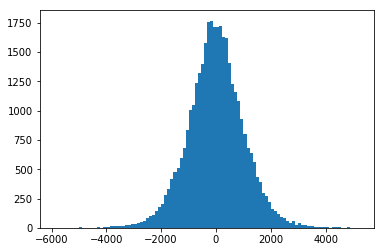

In [45]:
plt.hist(FinalVelocities, bins=100) #density=True
plt.savefig("/Users/Roberto Benard Orci/Documents/UNI/Verano Investigacion/Simulation data/Many Histograms/MassBin2HistogramsDS1000.png")